## This notebook can be used to rank a list of nodes from a category that connect to an entity such as a gene. 
#### Example 1: Which disease are associate with NPM1 gene?
#### Example 2: Which proteins interacts with protein NPM1?
#### Example 3: Which drugs or small molecules can interact with NPM1?


In [2]:
import sys
sys.path.append('../TCT')
import TCT as TCT
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [14]:
# Step1: List all the APIs in the translator system
Translator_KP_info,APInames= TCT.get_SmartAPI_Translator_KP_info()
Translator_KP_info.to_csv('SmartAPI_Translator_KP_info.csv', index=False)
print(len(Translator_KP_info))

53


In [4]:
# Step 2: Get metaKG and all predicates from Translator APIs
metaKG = TCT.get_KP_metadata(APInames) # This only applies to the Translator APIs  # This need revision because of the metaKG information changes from the SmartAPI team
#print(metaKG.columns)
#metaKG.to_csv('../metaData/metaKG.csv', index=False)
#metaKG = pd.read_csv('../metaData/metaKG.csv')
print(metaKG.shape)
All_predicates = list(set(metaKG['KG_category']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))

(10580, 5)


In [29]:
selected_categories = ['biolink:Activity',
 'biolink:AnatomicalEntity',
 'biolink:Bacterium',
 'biolink:Behavior',
 'biolink:BehavioralFeature',
 'biolink:BiologicalEntity',
 'biolink:BiologicalProcess',
 'biolink:BiologicalProcessOrActivity',
 'biolink:Cell',
 'biolink:CellLine',
 'biolink:CellularComponent',
 'biolink:CellularOrganism',
 'biolink:ChemicalEntity',
 'biolink:ChemicalExposure',
 'biolink:ChemicalMixture',
 'biolink:ClinicalAttribute',
 'biolink:ClinicalFinding',
 'biolink:ClinicalIntervention',
 'biolink:Cohort',
 'biolink:ComplexMolecularMixture',
 'biolink:Device',
 'biolink:DiagnosticAid',
 'biolink:Disease',
 'biolink:DiseaseOrPhenotypicFeature',
 'biolink:Drug',
 'biolink:DrugExposure',
 'biolink:EnvironmentalExposure',
 'biolink:EnvironmentalFeature',
 'biolink:Food',
 'biolink:Fungus',
 'biolink:Gene',
 'biolink:GeneFamily',
 'biolink:Genotype',
 'biolink:GrossAnatomicalStructure',
 'biolink:LifeStage',
 'biolink:MacromolecularComplex',
 'biolink:MacromolecularComplexMixin',
 'biolink:MolecularActivity',
 'biolink:MolecularEntity',
 'biolink:MolecularMixture',
 'biolink:NucleicAcidEntity',
 'biolink:Organism',
 'biolink:OrganismTaxon',
 'biolink:PairwiseGeneToGeneInteraction',
 'biolink:PathologicalProcess',
 'biolink:Pathway',
 'biolink:Phenomenon',
 'biolink:PhenotypicFeature',
 'biolink:PhysicalEntity',
 'biolink:PhysiologicalProcess',
 'biolink:Plant',
 'biolink:Polypeptide',
 'biolink:PopulationOfIndividualOrganisms',
 'biolink:Procedure',
 'biolink:ProcessedMaterial',
 'biolink:Protein',
 'biolink:ProteinComplex',
 'biolink:ProteinFamily',
 'biolink:RNAProduct',
 'biolink:SequenceVariant',
 'biolink:SmallMolecule',
 'biolink:Transcript',
 'biolink:Vertebrate',
 'biolink:Virus']

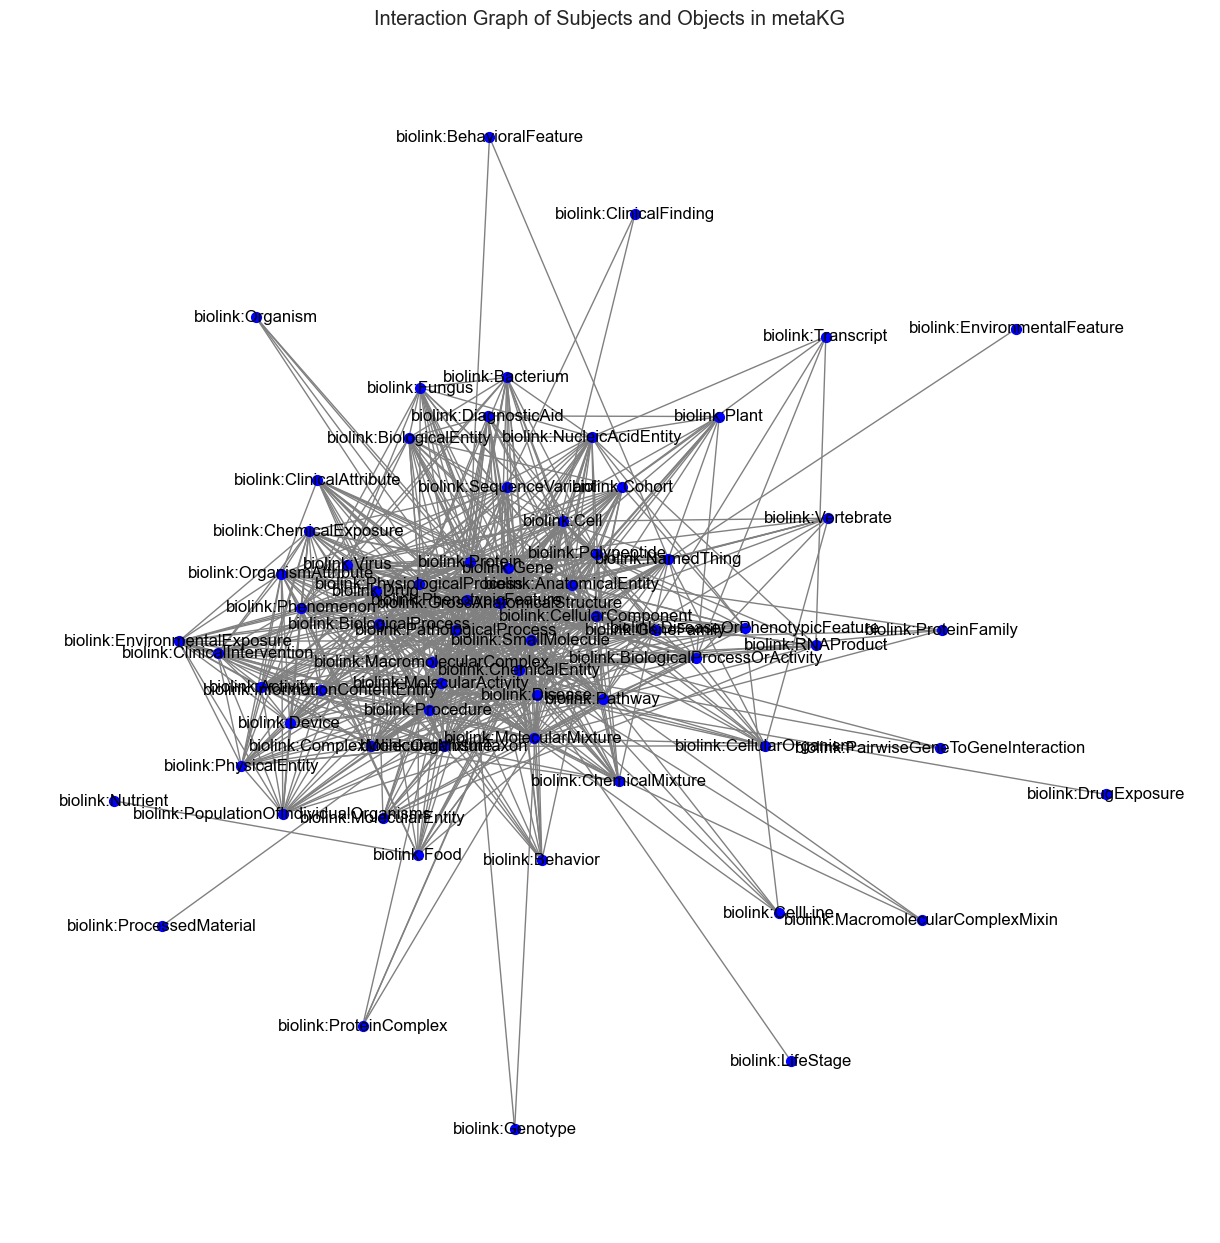

In [31]:
metaKG
# draw the interaction graph between subject and object in the metaKG using networkx
# first, we need to drop the interactions between subjects and objects that both subjects and objects are the same
metaKG = metaKG[metaKG['Subject'] != metaKG['Object']]
# second, we need to filter the metaKG to only include the selected categories
metaKG = metaKG[metaKG['Subject'].isin(selected_categories) | metaKG['Object'].isin(selected_categories)]
G = nx.from_pandas_edgelist(metaKG, source='Subject', target='Object', edge_attr='KG_category')
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos, with_labels=True, 
        node_size=50, font_size=12, 
        font_color='black', 
        node_color='blue', 
        edge_color='gray')
plt.title('Interaction Graph of Subjects and Objects in metaKG')
plt.show()

In [5]:
#len(set(Translator_KP_info['title']))
Translator_KP_info['title']

0                   Connections Hypothesis Provider API
1                                               MolePro
2              CATRAX Pharmacogenomics KP - TRAPI 1.5.0
3                         imProving Agent for TRAPI 1.5
4     Genetics Data Provider for NCATS Biomedical Tr...
5                      Clinical Trials KP - TRAPI 1.5.0
6                ARAX Translator Reasoner - TRAPI 1.5.0
7                 Gene-List Network Enrichment Analysis
8                                 RTX KG2 - TRAPI 1.5.0
9                           Multiomics KP - TRAPI 1.5.0
10                          Text Mined Cooccurrence API
11                               Service Provider TRAPI
12                          Text Mined Cooccurrence API
13                                           mediKanren
14                                           COHD TRAPI
15                     Automat-binding-db(Trapi v1.5.0)
16                          Microbiome KP - TRAPI 1.5.0
17                   Automat-drug-central(Trapi 

In [6]:
# Step 3: set input parameters
# Test multiomics BigGIM Drug Response KP
# Node1 for query
input_node1 = 'FLT3'
input_node1_id = TCT.get_curie(input_node1)
print(input_node1_id)
input_node1_list = [input_node1_id]
input_node1_category = ['biolink:Gene'] # Node: this has to be in a format of biolink:xxx

#Node2 for query
input_node2_list = []
input_node2_category = ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalSubstance']
#input_node2_category = ['biolink:Gene']

# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates = list(set(TCT.select_concept(sub_list=input_node1_category,
                                              obj_list=input_node2_category,
                                              metaKG=metaKG)))



print("all relevant predicates in Translator:")
print(sele_predicates)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs = TCT.select_API(sub_list=input_node1_category,
                           obj_list=input_node2_category,
                           metaKG=metaKG)

print("all relevant APIs in Translator:")
print(sele_APIs)
print(len(sele_APIs))

# get API URLs
API_URLs = TCT.get_Translator_API_URL(sele_APIs, 
                                      APInames)

NCBIGene:2322
all relevant predicates in Translator:
['biolink:affects_response_to', 'biolink:response_affected_by', 'biolink:is_substrate_of', 'biolink:similar_to', 'biolink:produces', 'biolink:disrupts', 'biolink:part_of', 'biolink:derives_into', 'biolink:output_of', 'biolink:occurs_together_in_literature_with', 'biolink:derives_from', 'biolink:correlated_with', 'biolink:increases_response_to', 'biolink:sensitivity_associated_with', 'biolink:associated_with_decreased_likelihood_of', 'biolink:positively_correlated_with', 'biolink:related_to_at_instance_level', 'biolink:coexists_with', 'biolink:has_gene_product', 'biolink:has_substrate', 'biolink:produced_by', 'biolink:affects', 'biolink:disrupted_by', 'biolink:physically_interacts_with', 'biolink:gene_product_of', 'biolink:decreases_response_to', 'biolink:has_part', 'biolink:regulates', 'biolink:associated_with_increased_likelihood_of', 'biolink:directly_physically_interacts_with', 'biolink:affected_by', 'biolink:resistance_associated

In [7]:
# can use large language model to select predicates
sele_predicates = ['biolink:associated_with_resistance_to',
                   'biolink:associated_with_sensitivity_to', 
                   'biolink:occurs_together_in_literature_with',
                   'biolink:physically_interacts_with']

In [8]:
# Step 4: Format query json
query_json = TCT.format_query_json(input_node1_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node1_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates) # a list of predicates
query_json

{'message': {'query_graph': {'nodes': {'n0': {'ids': ['NCBIGene:2322'],
     'categories': ['biolink:Gene']},
    'n1': {'categories': ['biolink:Drug',
      'biolink:SmallMolecule',
      'biolink:ChemicalSubstance']}},
   'edges': {'e1': {'subject': 'n0',
     'object': 'n1',
     'predicates': ['biolink:associated_with_resistance_to',
      'biolink:associated_with_sensitivity_to',
      'biolink:occurs_together_in_literature_with',
      'biolink:physically_interacts_with']}}}}}

In [9]:

# Step 5: Query Translator APIs and parse results
result = TCT.parallel_api_query(API_URLs,query_json=query_json, max_workers=len(API_URLs))

# Step 6: Parse results
result_parsed = TCT.parse_KG(result)

# Step 7: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores = TCT.rank_by_primary_infores(result_parsed, input_node1_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:1017"


Warning Code:404:https://molepro-trapi.transltr.io/molepro/trapi/v1.5/query/
Warning Code:422:https://automat.transltr.io/hmdb/query/
Warning Code:422:https://automat.transltr.io/ctd/query/
Success!https://automat.transltr.io/cam-kp/query/
Success!https://automat.transltr.io/hetio/query/
Warning Code:422:https://automat.transltr.io/icees-kg/query/
Success!https://automat.transltr.io/gtopdb/query/
Warning Code:422:https://automat.renci.org/ehr-may-treat-kp/query/
Warning Code:422:https://automat.renci.org/ehr-clinical-connections-kp/query/
Success!https://automat.transltr.io/pharos/query/
Success!https://automat.transltr.io/robokopkg/query/
Success!https://bte.transltr.io/v1/team/Service%20Provider/query/
Success!https://bte.transltr.io/v1/query/
CHEMBL.COMPOUND:CHEMBL4795462: no preferred name
CHEMBL.COMPOUND:CHEMBL4798601: no preferred name
CHEMBL.COMPOUND:CHEMBL3656365: no preferred name
CHEMBL.COMPOUND:CHEMBL3656366: no preferred name
CHEMBL.COMPOUND:CHEMBL3656369: no preferred name

In [14]:
result_ranked_by_primary_infores

,output_node,Name,Num_of_primary_infores,type_of_nodes,unique_predicates
423,CHEBI:63452,Midostaurin,5,object,"[biolink:physically_interacts_with, biolink:ph..."
421,CHEBI:78543,Ponatinib,5,object,"[biolink:physically_interacts_with, biolink:ph..."
439,CHEBI:91408,Fedratinib,4,object,"[biolink:physically_interacts_with, biolink:oc..."
422,CHEBI:91471,LSM-1231,4,object,"[biolink:physically_interacts_with, biolink:oc..."
448,CHEBI:49960,Vandetanib,4,object,"[biolink:physically_interacts_with, biolink:oc..."
...,...,...,...,...,...
1651,PUBCHEM.COMPOUND:118439773,4-[[2-(butylamino)-5-[5-[[(3R)-3-(dimethylamin...,1,object,"[biolink:physically_interacts_with, biolink:ph..."
1652,INCHIKEY:QQTWEWAFAIDGJB-MXVIHJGJSA-N,INCHIKEY:QQTWEWAFAIDGJB-MXVIHJGJSA-N,1,object,"[biolink:physically_interacts_with, biolink:ph..."
1653,PUBCHEM.COMPOUND:117849653,2-[[2-(Butylamino)-5-pyridin-2-ylpyrimidin-4-y...,1,object,"[biolink:physically_interacts_with, biolink:ph..."
1654,INCHIKEY:WORRXRIVSMTSEB-CXIWYSOXSA-N,INCHIKEY:WORRXRIVSMTSEB-CXIWYSOXSA-N,1,object,"[biolink:physically_interacts_with, biolink:ph..."


In [15]:
print(query_json)

{'message': {'query_graph': {'nodes': {'n0': {'ids': ['NCBIGene:2322'], 'categories': ['biolink:Gene']}, 'n1': {'categories': ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalSubstance']}}, 'edges': {'e1': {'subject': 'n0', 'object': 'n1', 'predicates': ['biolink:associated_with_resistance_to', 'biolink:associated_with_sensitivity_to', 'biolink:occurs_together_in_literature_with', 'biolink:physically_interacts_with']}}}}}


CHEMBL.COMPOUND:CHEMBL4795462: no preferred name
CHEMBL.COMPOUND:CHEMBL4798601: no preferred name
CHEMBL.COMPOUND:CHEMBL4851303: no preferred name
CHEMBL.COMPOUND:CHEMBL4216043: no preferred name
CHEMBL.COMPOUND:CHEMBL4203825: no preferred name
CHEMBL.COMPOUND:CHEMBL4764646: no preferred name
CHEMBL.COMPOUND:CHEMBL45177: no preferred name
CHEMBL.COMPOUND:CHEMBL4861169: no preferred name
CHEMBL.COMPOUND:CHEMBL4849169: no preferred name
CHEMBL.COMPOUND:CHEMBL4277445: no preferred name
CHEMBL.COMPOUND:CHEMBL4282510: no preferred name
CHEMBL.COMPOUND:CHEMBL4279673: no preferred name
CHEMBL.COMPOUND:CHEMBL4284541: no preferred name
CHEMBL.COMPOUND:CHEMBL4212241: no preferred name
CHEMBL.COMPOUND:CHEMBL4208669: no preferred name
CHEMBL.COMPOUND:CHEMBL3237706: no preferred name
CHEMBL.COMPOUND:CHEMBL3237707: no preferred name
CHEMBL.COMPOUND:CHEMBL3237708: no preferred name
CHEMBL.COMPOUND:CHEMBL3237709: no preferred name
CHEMBL.COMPOUND:CHEMBL3237710: no preferred name
CHEMBL.COMPOUND:CHEMBL

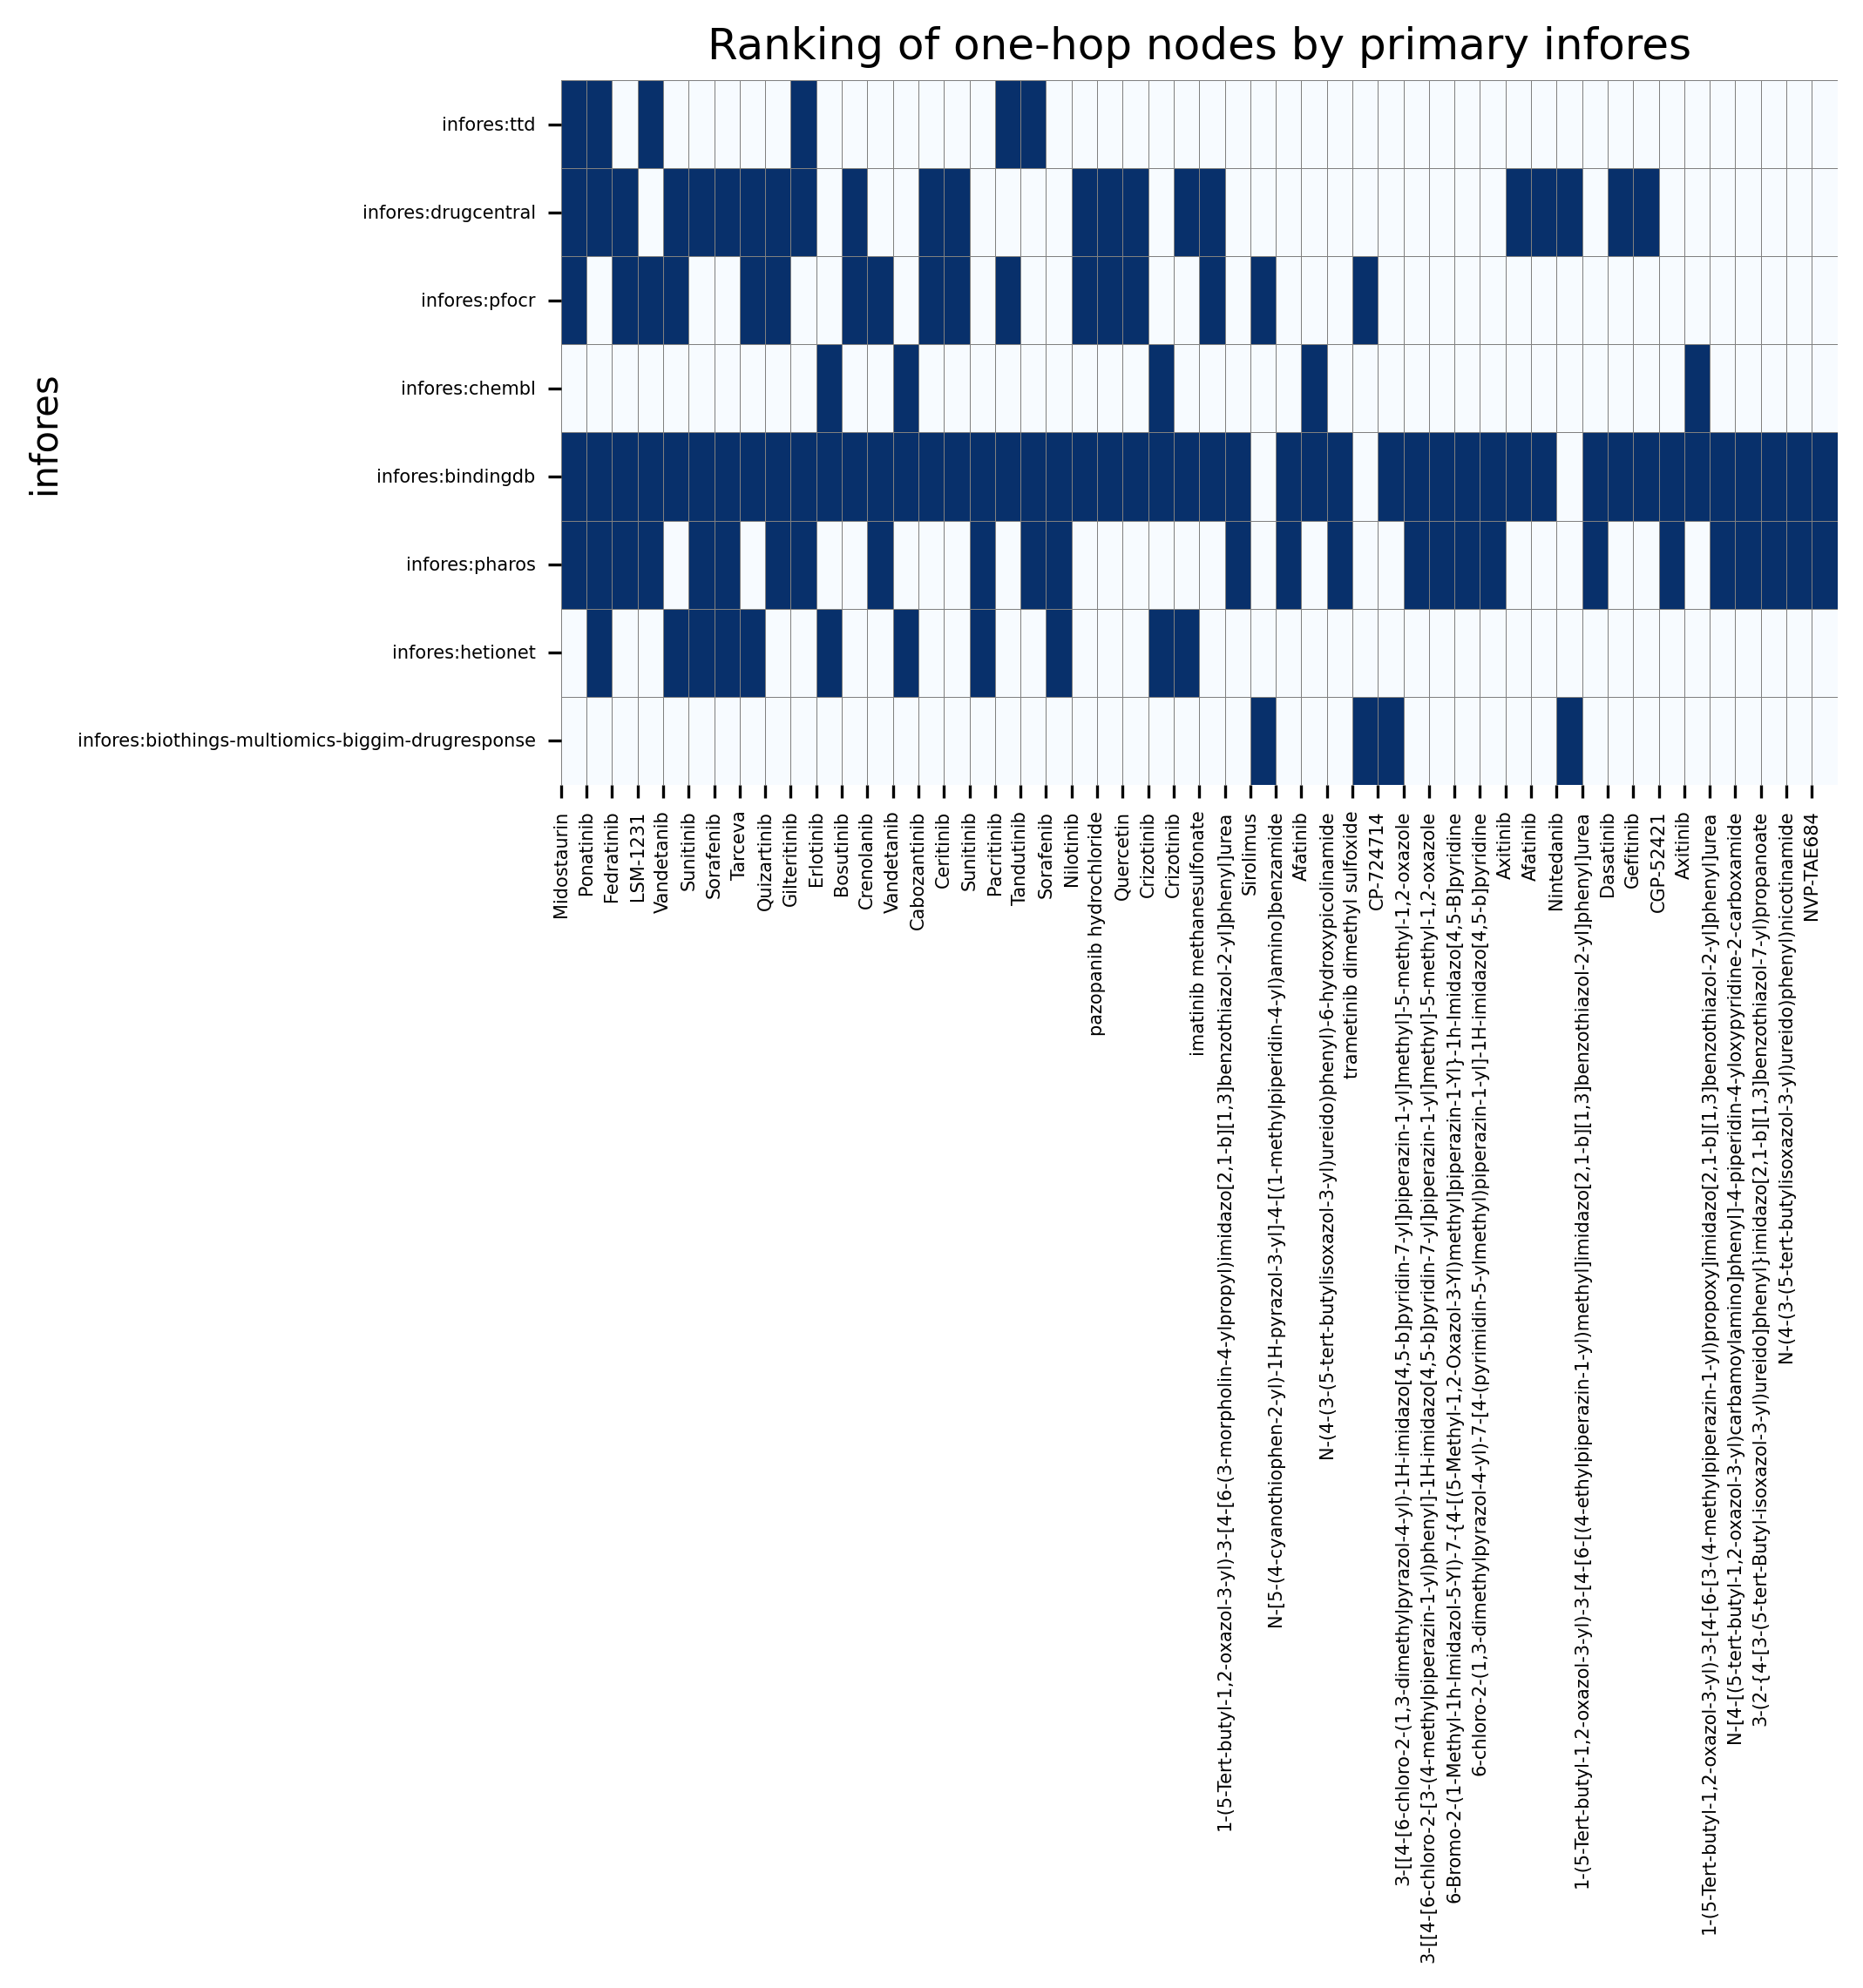

[Text(0.5, 0, 'Midostaurin'), Text(2.5, 0, 'Fedratinib'), Text(4.5, 0, 'Vandetanib'), Text(6.5, 0, 'Sorafenib'), Text(8.5, 0, 'Quizartinib'), Text(10.5, 0, 'Erlotinib'), Text(12.5, 0, 'Crenolanib'), Text(14.5, 0, 'Cabozantinib'), Text(16.5, 0, 'Sunitinib'), Text(18.5, 0, 'Tandutinib'), Text(20.5, 0, 'Nilotinib'), Text(22.5, 0, 'Quercetin'), Text(24.5, 0, 'Crizotinib'), Text(26.5, 0, '1-(5-Tert-butyl-1,2-oxazol-3-yl)-3-[4-[6-(3-morpholin-4-ylpropyl)imidazo[2,1-b][1,3]benzothiazol-2-yl]phenyl]urea'), Text(28.5, 0, 'N-[5-(4-cyanothiophen-2-yl)-1H-pyrazol-3-yl]-4-[(1-methylpiperidin-4-yl)amino]benzamide'), Text(30.5, 0, 'N-(4-(3-(5-tert-butylisoxazol-3-yl)ureido)phenyl)-6-hydroxypicolinamide'), Text(32.5, 0, 'CP-724714'), Text(34.5, 0, '3-[[4-[6-chloro-2-[3-(4-methylpiperazin-1-yl)phenyl]-1H-imidazo[4,5-b]pyridin-7-yl]piperazin-1-yl]methyl]-5-methyl-1,2-oxazole'), Text(36.5, 0, '6-chloro-2-(1,3-dimethylpyrazol-4-yl)-7-[4-(pyrimidin-5-ylmethyl)piperazin-1-yl]-1H-imidazo[4,5-b]pyridine'), Te

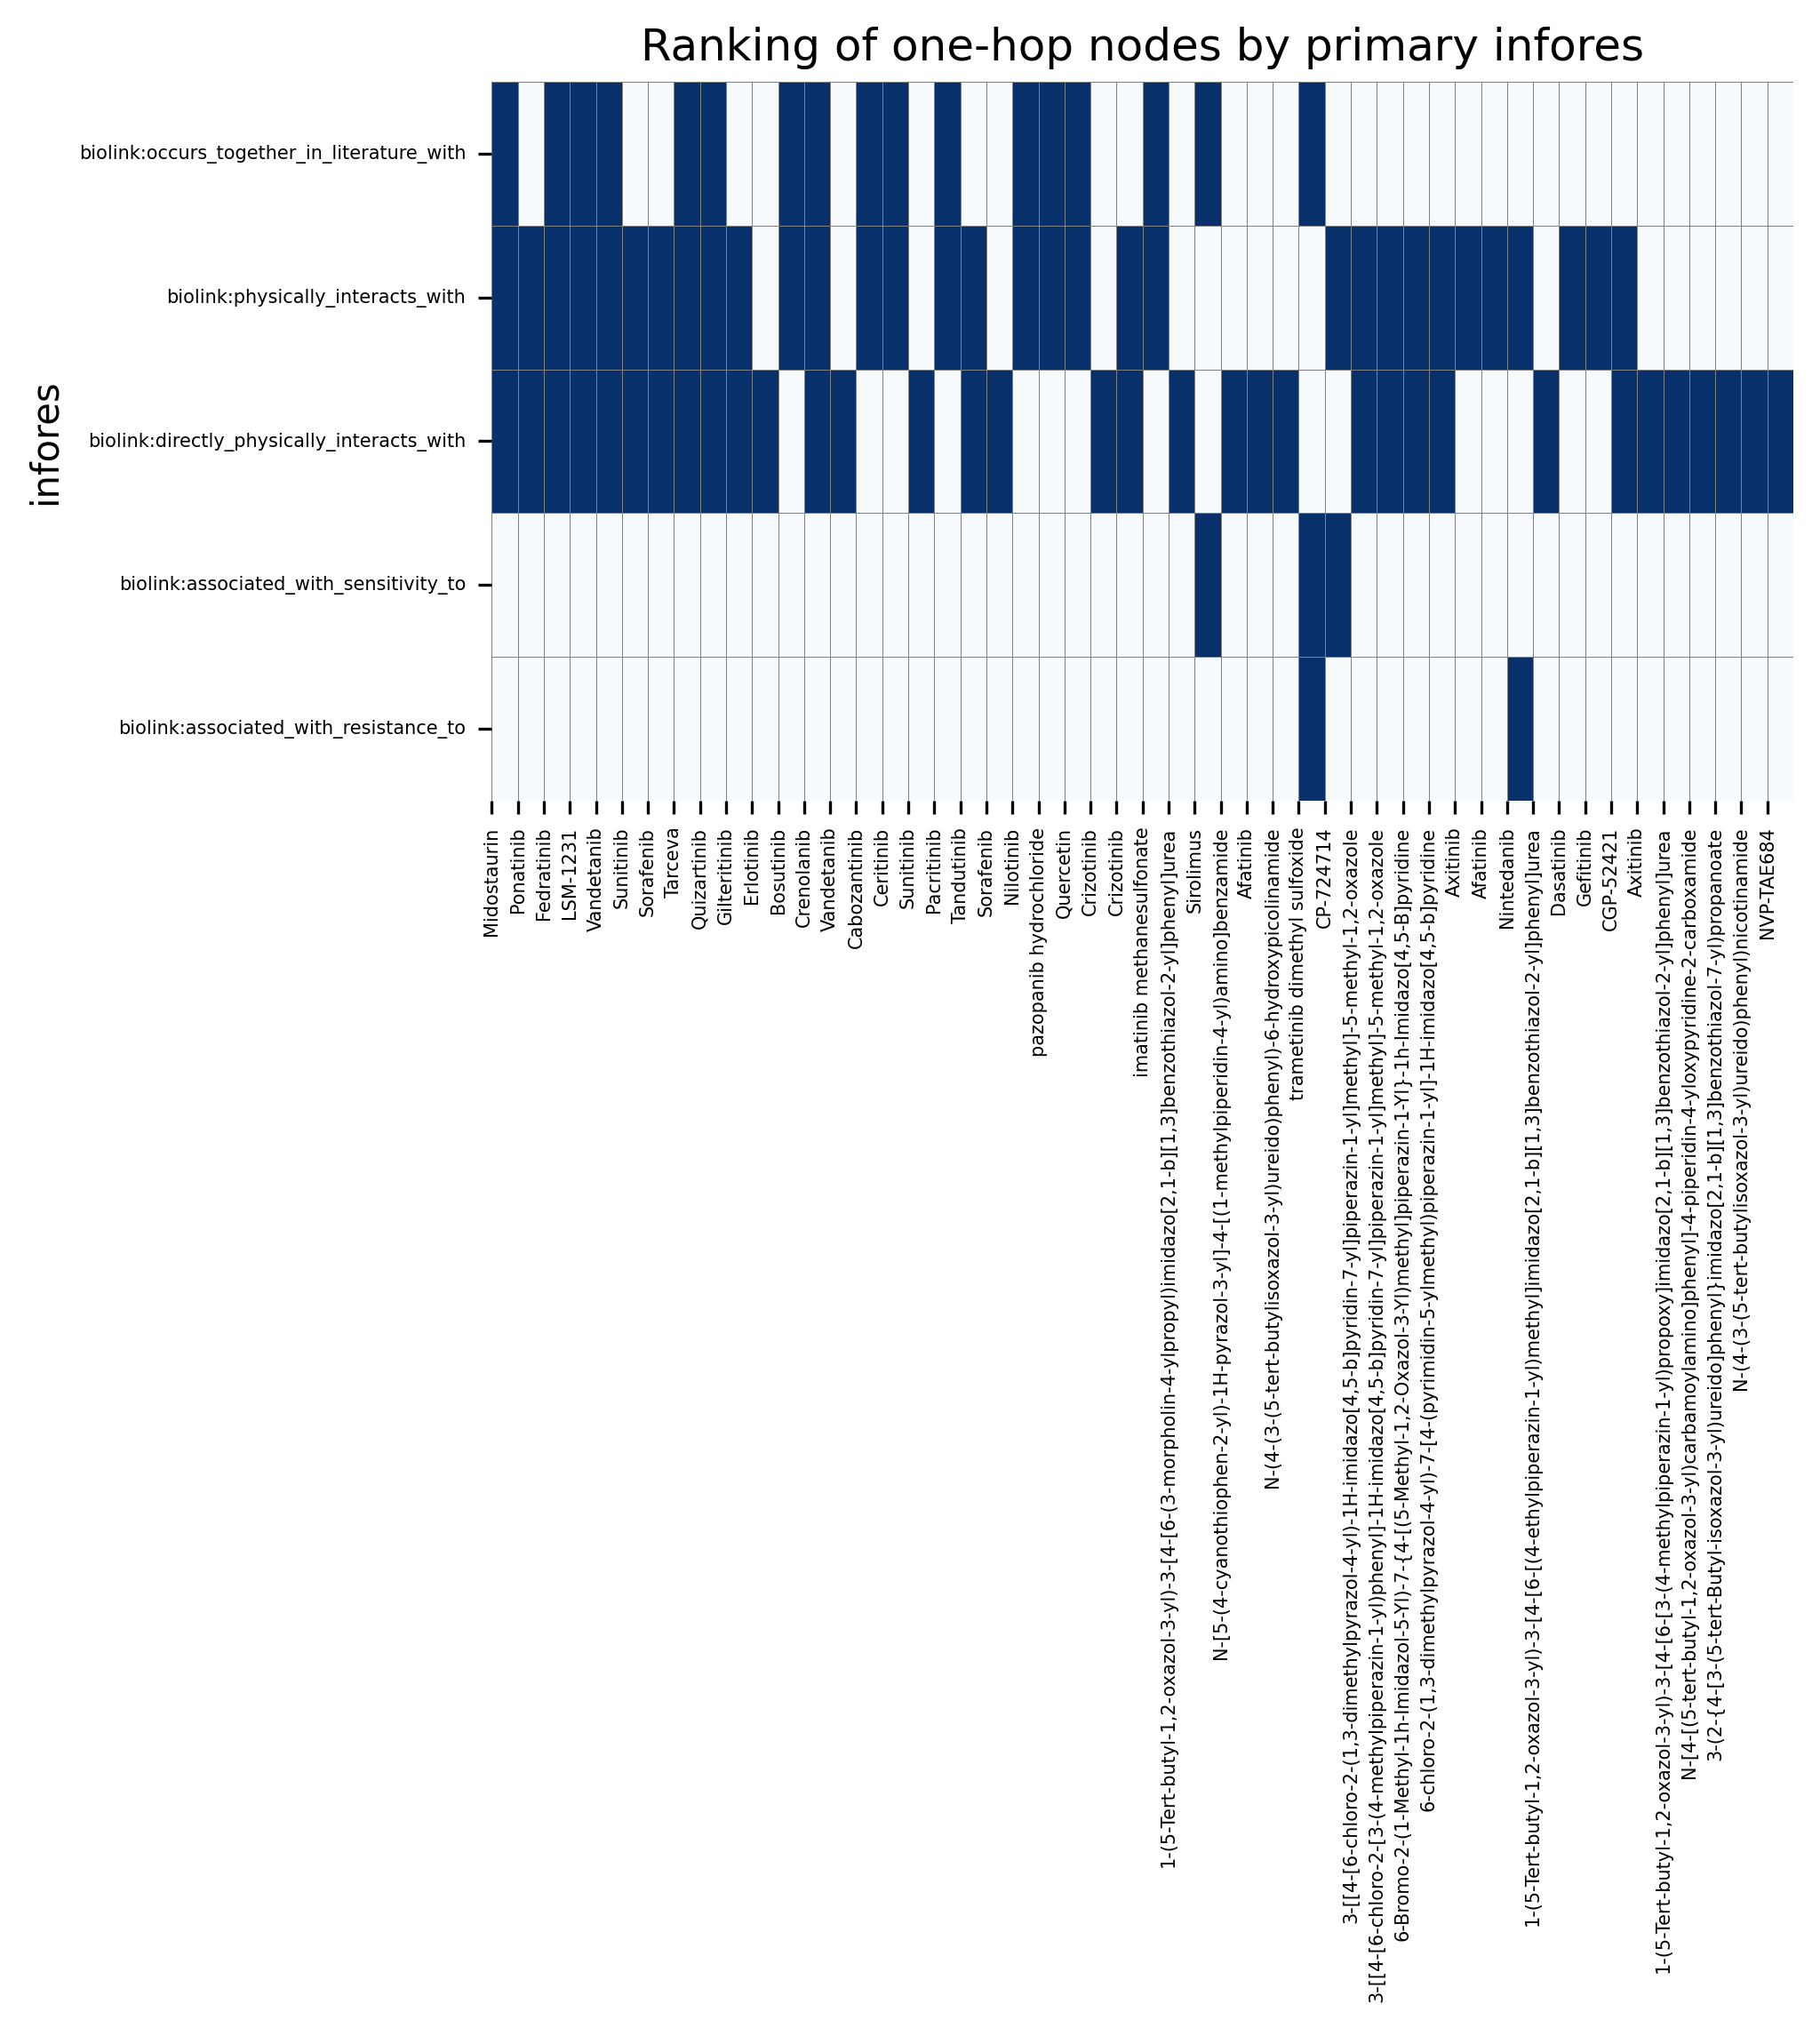

,Midostaurin,Ponatinib,Fedratinib,LSM-1231,Vandetanib,Sunitinib,Sorafenib,Tarceva,Quizartinib,Gilteritinib,...,INCHIKEY:TVOBCJAKLFDOFL-WEBLMRDCSA-N,INCHIKEY:VXGYSGCTPBOVEG-CXIWYSOXSA-N,INCHIKEY:KQTRQDMQBAIPKT-HDJSIYSDSA-N,INCHIKEY:RXNGZWXHXININL-IBFNMHAXSA-N,INCHIKEY:GMAFXYZWTSGYMU-LCKWQUASSA-N,4-[[2-(butylamino)-5-[5-[[(3R)-3-(dimethylamino)pyrrolidin-1-yl]methyl]pyridin-2-yl]pyrimidin-4-yl]amino]cyclohexan-1-ol,INCHIKEY:QQTWEWAFAIDGJB-MXVIHJGJSA-N,2-[[2-(Butylamino)-5-pyridin-2-ylpyrimidin-4-yl]amino]ethanol,INCHIKEY:WORRXRIVSMTSEB-CXIWYSOXSA-N,FLT3-IN-5e
biolink:occurs_together_in_literature_with,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
biolink:physically_interacts_with,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
biolink:directly_physically_interacts_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
biolink:associated_with_sensitivity_to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:associated_with_resistance_to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node1_id, 
                                fontsize = 5)


In [13]:
# End of the example
